# Mai Vu - Methods 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## 1. Data preprocessing

In [2]:
X = pd.read_csv('phishing.csv', sep = ';', index_col = None) #Read file
print('Dataset shape = ', X.shape)
X.sample(10) #take 10 sample from the dataset

Dataset shape =  (11055, 31)


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
3354,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,1,1,1
8470,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,-1,-1,1,0,1,1
4118,1,1,1,1,1,-1,0,1,-1,-1,...,-1,-1,-1,-1,1,-1,1,-1,1,1
414,1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,0,-1,1,0,1,-1
8171,1,-1,-1,1,1,-1,0,1,-1,1,...,1,1,1,1,-1,-1,1,0,1,1
7688,-1,-1,1,1,1,-1,1,1,1,1,...,1,1,-1,1,0,1,1,1,1,1
9650,1,-1,1,1,1,-1,-1,0,1,1,...,1,1,1,1,0,-1,1,0,1,-1
7558,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,-1,1,1,-1,1,0,1,1
10287,1,-1,1,1,1,-1,0,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
2087,1,-1,1,1,1,-1,0,0,-1,1,...,1,1,1,1,-1,-1,1,0,1,-1


In [3]:
print(X.columns)

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWindow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')


In [4]:
X.describe().round(4)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.0000,11055.0000,11055.0000,11055.0000,11055.0000,11055.0000,11055.0000,11055.0000,11055.0000,11055.0000,...,11055.0000,11055.0000,11055.0000,11055.0000,11055.0000,11055.0000,11055.0000,11055.0000,11055.0000,11055.0000
mean,0.3138,-0.6332,0.7388,0.7006,0.7415,-0.7350,0.0640,0.2509,-0.3368,0.6286,...,0.6134,0.8169,0.0612,0.3771,0.2873,-0.4837,0.7216,0.3440,0.7196,0.1139
std,0.9495,0.7661,0.6740,0.7136,0.6710,0.6781,0.8175,0.9119,0.9416,0.7778,...,0.7898,0.5768,0.9982,0.9262,0.8277,0.8753,0.6924,0.5699,0.6944,0.9935
min,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,...,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
25%,-1.0000,-1.0000,1.0000,1.0000,1.0000,-1.0000,-1.0000,-1.0000,-1.0000,1.0000,...,1.0000,1.0000,-1.0000,-1.0000,0.0000,-1.0000,1.0000,0.0000,1.0000,-1.0000
50%,1.0000,-1.0000,1.0000,1.0000,1.0000,-1.0000,0.0000,1.0000,-1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,-1.0000,1.0000,0.0000,1.0000,1.0000
75%,1.0000,-1.0000,1.0000,1.0000,1.0000,-1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [5]:
print('Occurrences of the predicted attribute:\n' + str(X['Result'].value_counts()))

Occurrences of the predicted attribute:
 1    6157
-1    4898
Name: Result, dtype: int64


In [6]:
#Divide the dataset to training and test sets 
train, test = train_test_split(X, test_size = 0.33)

train_labels = train['Result'].copy()
train = train.drop('Result',axis = 1)
test_labels = test['Result'].copy()
test = test.drop('Result',axis = 1)

## 2. Decision tree

In [7]:
clf = tree.DecisionTreeClassifier(max_depth = 2)
clf = clf.fit(train, train_labels)

In [8]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names = train.columns, 
                                class_names = ['-1','1'], 
                                proportion = True, 
                                node_ids = True)
graph = graphviz.Source(dot_data)
graph.render()

'Source.gv.pdf'

## 3. Accuracy for the decision tree

In [9]:
print('__THE TRAIN__')
print('Classification report:\n', classification_report(clf.predict(train), train_labels))
print('Accuracy =', round(accuracy_score(clf.predict(train), train_labels),5))
print('Confusion matrix =\n', confusion_matrix(clf.predict(train), train_labels).T)

__THE TRAIN__
Classification report:
               precision    recall  f1-score   support

          -1       0.90      0.89      0.90      3323
           1       0.91      0.92      0.92      4083

   micro avg       0.91      0.91      0.91      7406
   macro avg       0.91      0.90      0.91      7406
weighted avg       0.91      0.91      0.91      7406

Accuracy = 0.90656
Confusion matrix =
 [[2955  324]
 [ 368 3759]]


In [10]:
print('__THE TEST__')
print('Classification report:\n', classification_report(clf.predict(test), test_labels))
print('Accuracy =', round(accuracy_score(clf.predict(test), test_labels),5))
print('Confusion matrix =\n', confusion_matrix(clf.predict(test), test_labels).T)

__THE TEST__
Classification report:
               precision    recall  f1-score   support

          -1       0.91      0.88      0.90      1665
           1       0.90      0.92      0.91      1984

   micro avg       0.91      0.91      0.91      3649
   macro avg       0.91      0.90      0.90      3649
weighted avg       0.91      0.91      0.91      3649

Accuracy = 0.90573
Confusion matrix =
 [[1470  149]
 [ 195 1835]]


## 4. Instructions to decide whether the website is likely to be phishing site or not

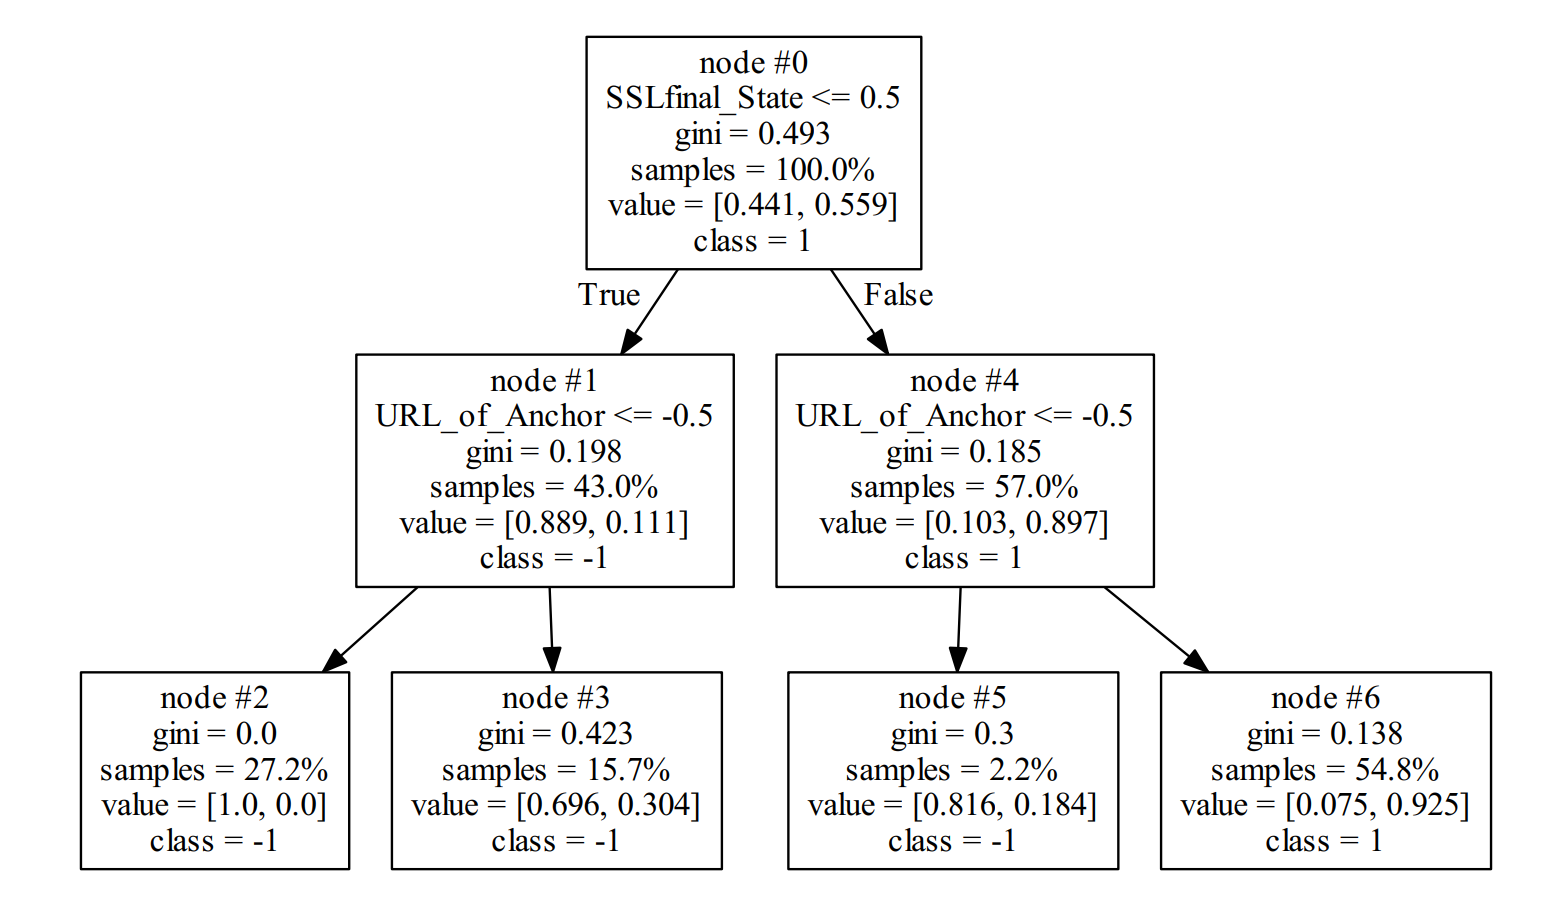

<div style="text-align: justify">According to the tree decision image (from the above model), the first attribute to look at is the <b>SSLfinal_State</b>. This attribute tells the license assigned with HTTPS including the trust certificate issuer and the certificate age.<br>
∘ If HTTPS is used and the issuer is trusted with the age of certificate is more or equal 1 year, it holds the value 1.<br>
∘ If HTTPS is used but the issuer is not trusted, it equals 0.<br>
∘ Otherwise, it is -1.<br>  
If <b>SSLfinal_State</b> equals -1 or 0 (<= 0.5) than it is certainly the <i>phishing site</i>. And we finish the left sub-tree because most sites fail into this sub-tree are mostly phishing.<br>

The next attribute to consider is <b>URL_of_Anchor</b> which shows the percentage of URL of Anchor from the site.<br>
∘ If the percentage is less than 31%, it equals 1.<br>
∘ If the percentage in [31,67] range, it is 0.<br>
∘ Otherwise, it holds the value -1.<br>
For sub-tree on the right, if the <b>URL_of_Anchor</b> equals 0 or 1 (> -0.5) than approximately 90% it is a <i>legitimate site</i>. So if the percentage of URL of Anchor is more than 67%, it most likely a <i>phishing site</i>.<br>

This is such a simple model that easy to explain for everybody to understand. The accuracy of this model is around 90%. Still, of course, there are more complex decision trees that give higher accuracy for website classification but it would be difficult to fully explain.
<div style="text-align: justify">